# 第五章：正态模型
Dreisteine, 2021.07.30

---

## 一、正态模型

连续随机变量$Y$的概率密度满足:

$$
p(y|\theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{y-\theta}{2}\right)^2},\quad -\infty< y< \infty
$$

正态分布满足：
* 对称性
* 左右$1.96 \approx 2$个标准差以内满足95%置信度
* 若$X\sim {\rm normal}(\mu, \tau^2),Y\sim \rm{normal}(\theta, \sigma^2)$，且**X和Y相互独立**，则$aX+bY \sim \rm{normal}(a\mu+b\theta, a^2\tau^2+b^2\sigma^2)$
* R里面的dnorm，rnorm，pnorm，qnorm这些函数都采用$\sigma$而非$\sigma^2$作为输入参数，注意不要混淆

### <u>算例1：妇女体重分布</u>

> 妇女体重($N=1375, \bar{y}=63.75, s=2.62$)近似取决于多种因素的线性加和：
>
> $$
y = a + b\times\rm{gene} + c\times\rm{diet} + d\times\rm{disease} + \cdots
$$
>
> **中心极限定理**告诉我们，样本$y_1,...,y_n$的经验分布将会近似于正态分布，因此正态模型能够作为合适的数据采样模型。

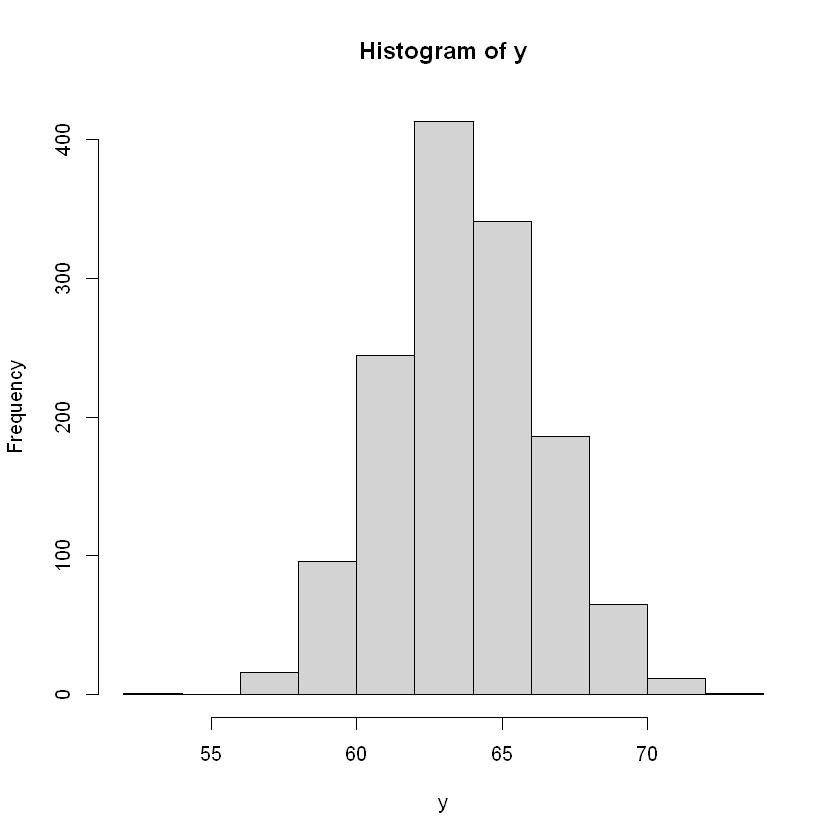

In [5]:
n <- 1375
y_avg <- 63.75; s <- 2.62

y <- rnorm(n, y_avg, s)
hist(y)

## 二、方差已知情形下对均值的推理

假设我们的采样模型为$\{Y_1,...,Y_n|\theta, \sigma^2\}\sim \text{ i.i.d. } \rm{normal}(\theta, \sigma^2)$，那么样本的联合分布密度为：

$$
\begin{aligned}
p\left(y_1,...,y_n|\theta, \sigma^2\right) &= \prod_{i=1}^n p(y_i|\theta, \sigma^2) \\
 &= \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{y_i -\theta}{\sigma}\right)^2} \\
 &= (2\pi\sigma^2)^{-n/2}\exp{\left\{-\frac{1}{2}\sum{\left(\frac{y_i-\theta}{\sigma}\right)^2}\right\}}
\end{aligned}
$$

其中

$$
\sum_{i=1}^{n}{\left(\frac{y_i-\theta}{\sigma}\right)^2}=\frac{1}{\sigma^2}\sum{y_i^2}-2\frac{\theta}{\sigma^2}\sum{y_i}+n\frac{\theta^2}{\sigma^2}
$$

这说明$p\left(y_1,...,y_n|\theta, \sigma^2\right)$依赖于$y_1,...,y_n$，并且$\left\{\sum{y_i^2},\sum{y_i}\right\}$构成了关于$p\left(y_1,...,y_n|\theta, \sigma^2\right)$的二维**充分统计量**。更进一步地，当获得了样本的均值和方差信息$\left\{\bar{y}, s\right\}$后，也就确定了$p\left(y_1,...,y_n|\theta, \sigma^2\right)$，因此$\left\{\bar{y}, s\right\}$也是关于$\left\{\sum{y_i^2},\sum{y_i}\right\}$的一组充分统计量。

正态模型是一个双参数模型，对于其中参数$\theta,\sigma^2$的推断可被分解为两个单参数推断问题。例如已知方差来推断均值，根据贝叶斯公式有：

$$
p(\theta|y_1,...,y_n,\sigma^2) \times p(y_1,...,y_n|\sigma^2) = p(\theta|\sigma^2) \times p(y_1, ...,y_n|\theta, \sigma^2)
$$

那么

$$
p(\theta|y_1,...,y_n,\sigma^2) = \frac{p(\theta|\sigma^2) \times p(y_1, ...,y_n|\theta, \sigma^2)}{p(y_1,...,y_n|\sigma^2)}
$$

其中分母$p(y_1,...,y_n|\sigma^2)$与待估计参数$\theta$无关，因此

$$
\begin{aligned}
p(\theta|y_1,...,y_n,\sigma^2) & \propto p(\theta|\sigma^2) \times p(y_1, ...,y_n|\theta, \sigma^2) \\
    & = p(\theta|\sigma^2) \times e^{-\frac{1}{2\sigma^2}\sum{(y_i-\theta)^2}} \\
    & = p(\theta|\sigma^2) \times e^{c_1(\theta - c_2)^2}
\end{aligned}
$$

根据Chapter 3，若后验分布与采样分布属于同一类型，那么先验分布也是共轭的。从上式可以看出，如果先验分布$p(\theta|\sigma^2)$是共轭的，那么必然包含如$e^{c_1(\theta - c_2)^2}$的二次项。在实数域$\mathbb R$上最简单的此种类型分布便是正态分布。如果$p(\theta|\sigma^2)$为正态分布，样本$y_1,...,y_n$为从$\rm{normal}(\theta, \sigma^2)$分布中独立采样的样本，那么$p(\theta|y_1,...,y_n,\sigma^2)$也是正态分布。具体推导如下(其中$\tau_0$和$\mu_0$是对$\theta|\sigma^2$的先验估计参数)：

$$
\begin{aligned}
p(\theta|y_1,...,y_n,\sigma^2) & \propto p(\theta|\sigma^2) \times p(y_1, ...,y_n|\theta, \sigma^2) \\
    & = \exp{\left\{-\frac{1}{2\tau_0^2}(\theta - \mu_0)^2\right\}} \times \exp{\left\{\frac{-1}{2\sigma^2}\sum_i{(y_i - \theta)^2} \right\}} \\
    & = \exp{\left\{-\frac{1}{2}(a\theta^2-2b\theta) \right\}} \\
    & = \exp{\left\{-\frac{1}{2}a(\theta - b/2)^2 \right\}} \\
    & = \exp{\left\{-\frac{1}{2}\left(\frac{\theta - b/2}{1/\sqrt{a}}\right) \right\}} \\
\end{aligned}
$$

也是正态分布类型，其中$a=\frac{1}{\tau_0^2}, b=\frac{\mu_0}{\tau_0^2} + \frac{\sum_i{y_i}}{\sigma^2}, c = \left[\mu_0,\tau_0^2,y_1,...,y_n \right]$。由此可知，后验分布$p(\theta|y_1,...,y_n,\sigma^2)$满足：

$$
p(\theta|y_1,...,y_n,\sigma^2) \sim {\rm normal}\left(
\mu_n, 
\tau_n^2
\right)
$$

其中

$$
\begin{aligned}
\tau_n^2 &= \frac{1}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}} \\
\mu_n &= \frac{\frac{1}{\tau_0^2}\mu_0+\frac{n}{\sigma^2}\bar{y}}{\frac{1}{\tau_0^2}+\frac{n}{\sigma^2}} \\
\end{aligned}
$$

从上式可以看出：

$$
\frac{1}{\tau_n^2}=\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}
$$

### 2.1 正态模型准确率指标

对于正态分布建模，令：
* $\tilde{\tau}_n^2 = \frac{1}{\tau_n^2}$：后验准确率
* $\tilde{\tau}_0^2 =\frac{1}{\tau_0^2}$：先验准确率
* $\tilde{\sigma}^2 =\frac{1}{\sigma^2}$：采样准确率

### 2.2 正态模型分布指标

后验分布均值为：

$$
\mu_n = \frac{\tilde{\tau}_0^2}{\tilde{\tau}_0^2 + n\tilde{\sigma}^2}\mu_0 + \frac{n\tilde{\sigma}^2}{\tilde{\tau}_0^2 + n\tilde{\sigma}^2}\bar{y}
$$

### 2.3 模型预测

当观测到了$Y_1=y_1,...,Y_n=y_n$后，对下一个样本$\tilde Y$进行预测。$\tilde Y$的先验分布为：

$$
\left\{\tilde Y|\theta, \sigma^2 \right\} \sim {\rm normal}(\theta, \sigma^2)
$$

令$\tilde Y = \theta + \tilde \epsilon$，则有

$$
\left\{\tilde \epsilon|\theta, \sigma^2 \right\} \sim {\rm normal}(0, \sigma^2)
$$

后验分布计算，考虑到**$\theta$与$\epsilon$相互独立**：

$$
\begin{aligned}
{\rm E}\left[\tilde Y|y_1,...,y_n, \sigma^2 \right] & = {\rm E}\left[\theta|y_1,...,y_n, \sigma^2 \right] + {\rm E}\left[\tilde \epsilon|y_1,...,y_n, \sigma^2 \right] \\
& = \mu_n + 0
\end{aligned}
$$

$$
\begin{aligned}
{\rm Var}\left[\tilde Y|y_1,...,y_n, \sigma^2 \right] & = {\rm Var}\left[\theta|y_1,...,y_n, \sigma^2 \right] + {\rm Var}\left[\tilde \epsilon|y_1,...,y_n, \sigma^2 \right] \\
& = \tau_n^2 + \sigma^2
\end{aligned}
$$

因此

$$
\tilde Y | \sigma^2, y_1,...,y_n \sim {\rm normal}(\mu_n, \tau_n^2 + \sigma^2)
$$

### <u>算例2：Midge Wing Length</u>

> 获取了九只苍蝇的翅长数据，希望对种群翅长均值$\theta>0$进行估计。对于翅长的先验估计：$\mu_0 = 1.9$。关于$\theta > 0$的条件，需要我们选择先验分布时尽可能使得样本为正，考虑到正态分布中95%的样本位于均值附近2个标准差的范围，因此我们选择模型参数$\tau_0^2$满足$\mu_0 - 2 \times \tau_0 > 0$,所以有$\tau_0 < 1.9/2=0.95$。

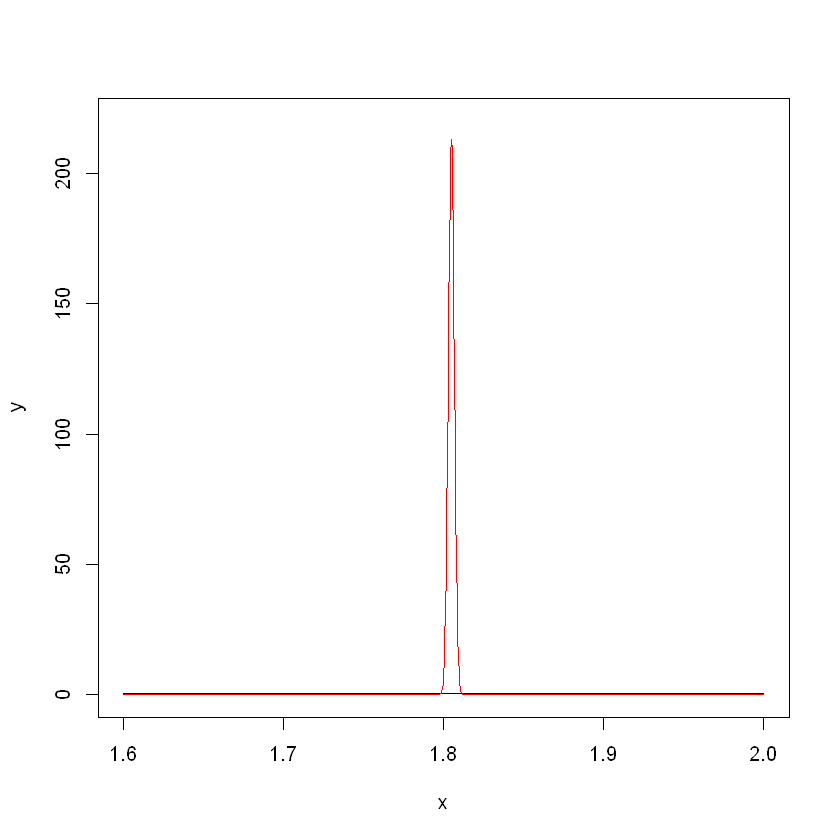

In [11]:
# 先验分布.
mu_0 <- 1.9; tau_0 <- 0.95

# 样本数据.
y <- c(1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08)
n <- length(y)

y_avg <- mean(y)
y_tau <- sqrt(var(y))  # 这里假设样本标准差y_tau为后验标准差\sigma

# 后验估计.
mu_n <- (mu_0 / tau_0^2 + y_avg * n / y_tau^2) / (1 / tau_0^2 + n / y_tau^2)
tau_n <- 1 / (1 / tau_0^2 + n / y_tau^2)

x <- seq(1.6, 2.0, length.out = 1000)
y_prior <- dnorm(x, mu_0, tau_0)
y_post <- dnorm(x, mu_n, tau_n)
plot(x, y_prior, type = 'l', ylim = c(0.0, 220.0), ylab="y")
lines(x, y_post, col = 'red')

> 但是，上述结果是基于后验分布方差$\sigma^2$等于样本方差$s^2$得出的，实际上由于样本数太少，这种假设难以成立，因此我们需要将$\sigma^2$视作未知来处理。

## 三、对均值和方差的联合推理

考虑对后验分布的$\mu$和$\sigma^2$同时进行估计，则有：

$$
p\left(\theta, \sigma^2|y_1,...,y_n\right) = p\left(y_1,...,y_n|\theta, \sigma^2\right)\cdot p(\theta,\sigma^2) / p(y_1,...,y_n)
$$

### 3.1 寻找先验分布的共轭

$$
p(\theta,\sigma^2)=p(\theta|\sigma^2)p(\sigma^2) \\
$$

从之前分析可知，若$\sigma^2$已知，则$\theta$的共轭先验分布为${\rm normal}(\mu_0, \tau_0^2)$，考虑$\tau_0^2=\sigma^2/ \kappa_0$的特例，其中$\sigma$为后验分布标准差，则：

$$
p(\theta|\sigma^2)={\rm dnorm}(\theta, \mu_0, \tau_0=\sigma/\sqrt{\kappa_0})\times p(\sigma^2)
$$

对于$\sigma^2$，我们需要能够对$(0,\infty)$进行描述的分布，如Poisson采样模型中采用的gamma分布族便是满足此条件的选择之一。但是不幸地是，该分布族对于正态方差$\sigma^2$并非共轭，但却是$1/\sigma^2$的共轭。当采用此分布时，我们认为$\sigma^2$具有inverse-gamma分布：

$$
\begin{aligned}
{\rm precision} = 1/\sigma^2 &\sim {\rm gamma}(a,b) \\
{\rm variance} = \sigma^2 &\sim \text{inverse-gamma}(a,b)
\end{aligned}
$$

参数化后

$$
1/\sigma^2 \sim {\rm gamma}(\frac{v_0}{2}, \frac{v_0}{2}\sigma_0^2)
$$

### 3.2 后验估计

假设先验分布和采样模型满足：

$$
\begin{aligned}
1/\sigma^2 &\sim {\rm gamma}(v_0/2, v_0\sigma_0^2/2)\\
\theta|\sigma^2 &\sim {\rm normal}(\mu_0, \sigma^2/\kappa_0) \\
Y_1,...,Y_n|\theta, \sigma^2 &\sim \text{ i.i.d. }{\rm normal}(\theta,\sigma^2)
\end{aligned}
$$

则有

$$
p(\theta, \sigma^2|y_1, ...,y_n) = p(\theta|\sigma^2, y_1,...,y_n)p(\sigma^2|y_1,...,y_n)
$$

根据之前第二节的推导

$$
\color{red}{\left\{\theta|\sigma^2, y_1,...,y_n\right\}\sim {\rm normal}(\mu_n, \sigma^2/\kappa_n)}
$$

其中

$$
\color{red}{\mu_n = \frac{\kappa_0}{\kappa_0+n}\mu_0 + \frac{n}{\kappa_0 + n}\bar{y}}
$$

对于第二项$p(\sigma^2|y_1,...,y_n)$:

$$
\begin{aligned}
p(\sigma^2|y_1,...,y_n) & \propto p(\sigma^2)p(y_1,...,y_n|\sigma^2) \\
    & = p(\sigma^2) \int p(y_1,...,y_n|\theta, \sigma^2)p(\theta|\sigma^2)d\theta
\end{aligned}
$$

最终经过微积分计算一番混战获得：

$$
\begin{aligned}
\color{red}{\left\{ 1/\sigma^2 | y_1,...,y_n \right\} \sim {\rm gamma}(\nu_n/2, \nu_n\sigma_n^2/2)}
\end{aligned}
$$

其中

$$
\begin{aligned}
&\color{red}{\nu_n = \nu_0 + n} \\ 
&\color{red}{\sigma_n^2 = \frac{1}{\nu_n}[\nu_0\sigma_0^2 + (n-1)s^2 + \frac{\kappa_0 n}{\kappa_n}(\bar{y}-\mu_0)^2]}
\end{aligned}
$$

### 3.3 Monte-Carlo采样

设计如下Monte-Carlo采样过程来对$\theta$和$\sigma^2$进行估计：

$$
\begin{array}{cc}
\sigma^{2(1)} \sim \text{inverse gamma}(\nu_n/2, \sigma_n^2n_n/2)& &\quad \theta^{(1)} \sim \text{normal}(\mu_n, \sigma^{2(1)}/\kappa_n) \\
\vdots&&\quad \vdots \\
\sigma^{2(S)} \sim \text{inverse gamma}(\nu_n/2, \sigma_n^2n_n/2)& &\quad \theta^{(S)} \sim \text{normal}(\mu_n, \sigma^{2(S)}/\kappa_n)
\end{array}
$$

这样便获得了一系列的采样结果$\left\{(\sigma^{2(1)},\theta^{(1)}),...,(\sigma^{2(S)},\theta^{(S)})\right\}$，便于计算分布概率$p(\theta, \sigma^2|y_1,...,y_n)$。

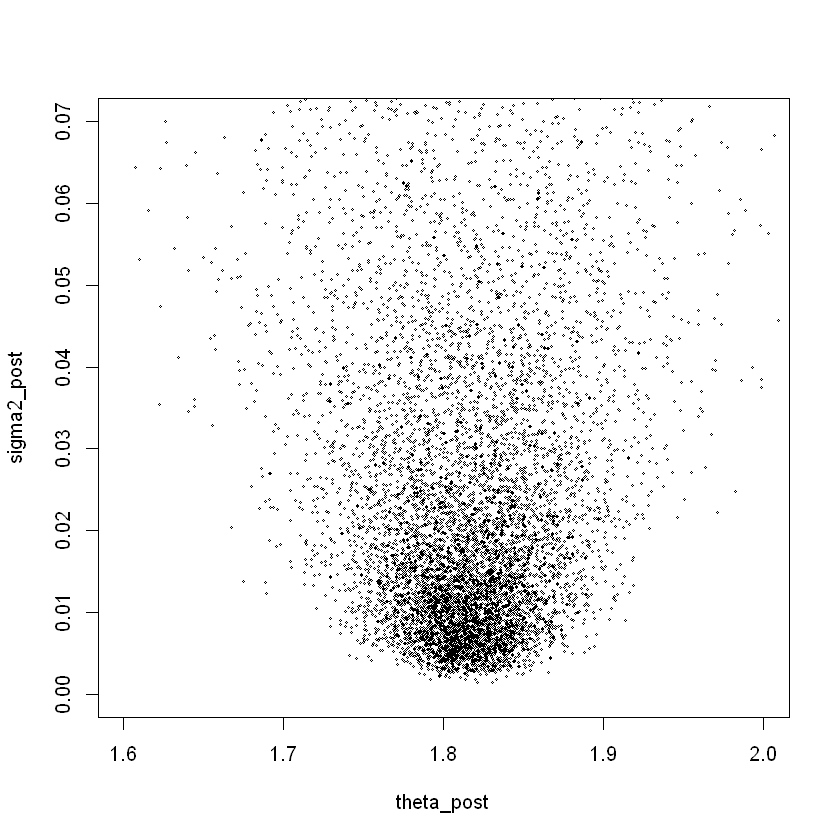

In [16]:
# 先验参数.
mu_0 <- 1.9; k_0 <- 1  # 先验估计分布的大致范围和参数
s2_0 <- 0.01; nu_0 <- 1

# 样本数据.
y <- c(1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.90, 2.08)
n <- length(y); y_bar <- mean(y); s2 <- var(y)

# 后验估计.
k_n <- k_0 + n; nu_n <- nu_0 + n
mu_n <- k_0 * mu_0 / k_n + n * y_bar / k_n
s2_n <- (mu_0 * s2_0 + (n - 1) * s2 + k_0 * n * (y_bar - mu_0)^2 / k_n) / nu_n

# MC采样.
N_mc = 10000
sigma2_post <- 1 / rgamma(N_mc, mu_n / 2, mu_n * s2_n / 2)
theta_post <- rnorm(N_mc, mu_n, sqrt(sigma2_post / k_n))  # 注意开方

plot(theta_post, sigma2_post, type="p", xlim=c(1.6, 2.0),ylim=c(0, 0.07), cex=0.3)